# Bounhar  #

In [554]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 1 Synthetic data

In [555]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generating the data.

In [556]:
N = 200

Label's array.

In [557]:
dLabel0 = np.zeros(N//2, dtype=int)
dLabel1 = np.ones(N//2, dtype=int)
Y = np.append(dLabel0, dLabel1)

In [558]:
mu1 = 1 # mean for x1
mu2 = -1 # mean for x2
sigma = 0.75 # standard deviation

In [559]:
x1 = np.random.normal(mu1, sigma, N//2) # Label 0
x2 = np.random.normal(mu2, sigma, N//2) # Label 1
XU = np.append(x1, x2)
X = np.append(1, XU)

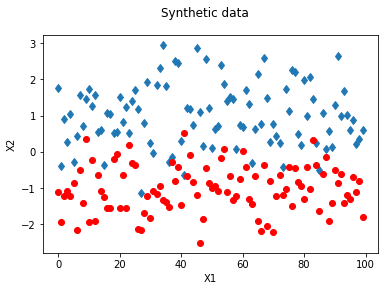

In [560]:
plt.plot(x1, 'd',x2, 'ro')
plt.xlabel("X1")
plt.ylabel("X2")
plt.suptitle('Synthetic data')
plt.show()

## Percepton's logic implementation

1- update the weights

2- compute v = wT(n).x(n)

3- apply activation function to v 

In [ ]:
p = [1,2,3]
q = [1,2,3]
p+

In [561]:
# To train the perceptron
def train(W, X,N, learningRate):
    error =0
    for i in range(N):
        # we compute the prediction based on X and the weights W
        y = predict(W,X,N)
        
        # if we have made an error, we must update the weight for the next iteration [w(i+1)]
        if y != Y[i] :
            error += 1
            W = W + learningRate*X[i]*Y[i]
            
    print("[TRAIN] Total error = ", error)
    print("[TRAIN] Accuracy = ", 1- error/N)
    return W, X                

# computes the prediction based on X and the weights W
def predict(W,X,N):
    v = computeV(W,X,N)
    y = applyActivation(v)
    return y
    
    
# computes V [doesn't include the hard limiter]
def computeV(W,X,N):
    product = np.dot(W,X)
    return np.sum(product)


# Apply the hard limiter (here we use the heaviside function)
def applyActivation(s):
    return np.heaviside(s,0)

# Testing the perceptron
def test(W,X,N) :
    error = 0
    for i in range(N):
        # we compute the prediction based on X and the weights W
        y = predict(W,X,N)
        
        # if we have made an error, we must update the weight for the next iteration [w(i+1)]
        if y != Y[i] :
            error += 1
            
    print("[TEST] Total error = ", error)
    print("[TEST] Accuracy = ", 1- error/N)

Initialization

In [562]:
weights = np.zeros(N, dtype=int) #3*np.random.random_sample((N,)) -0.25
W = np.append(1,weights)

In [563]:
W.shape

(201,)

In [564]:
X.shape

(201,)

## Training

In [565]:
weights = np.zeros(N, dtype=int) #3*np.random.random_sample((N,)) -0.25
W = np.append(1,weights)

learningRates = [0 , 0.3 , 0.004 , 0.005, 10]
for lr in learningRates :
    print("------ Learning Rate = ",lr)
    W, X = train(W, X,N, lr)

------ Learning Rate =  0
[TRAIN] Total error =  100
[TRAIN] Accuracy =  0.5
------ Learning Rate =  0.3
[TRAIN] Total error =  100
[TRAIN] Accuracy =  0.5
------ Learning Rate =  0.004
[TRAIN] Total error =  100
[TRAIN] Accuracy =  0.5
------ Learning Rate =  0.005
[TRAIN] Total error =  100
[TRAIN] Accuracy =  0.5
------ Learning Rate =  10
[TRAIN] Total error =  100
[TRAIN] Accuracy =  0.5


## Testing

In [534]:
x1 = np.random.normal(0, sigma, N//2) # Label 0
x2 = np.random.normal(2, sigma, N//2) # Label 1
XU = np.append(x1, x2)
X = np.append(1, XU)

In [535]:
W

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [536]:
test(W, X, N)

[TEST] Total error =  100
[TEST] Accuracy =  0.5


# 2 Real data

In [537]:
import pandas as pd

### Data Preprocessing 

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [538]:
header = ["sepal length","sepal width","petal length","petal width","class"]

In [539]:
df = pd.read_csv("data/iris.data", names=header)

In [540]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [541]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [542]:
def changeClassNamesToClassID(name):
    if name == "Iris-setosa" :
        return 0
    elif name == "Iris-versicolor":
        return 1
    else :
        return 2

In [543]:
df["class"] = df["class"].apply(changeClassNamesToClassID)

In [544]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [545]:
df["class"].unique()

array([0, 1, 2], dtype=int64)

In [546]:
df.groupby("class").describe()

sepal length                                             sepal width  \
             count   mean       std  min    25%  50%  75%  max       count   
class                                                                        
0             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1             50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2             50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

              ... petal length      petal width                             \
        mean  ...          75%  max       count   mean       std  min  25%   
class         ...                                                            
0      3.418  ...        1.575  1.9        50.0  0.244  0.107210  0.1  0.2   
1      2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2      2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                      
       50%  75%  max  
class                 
0      0.2  0.3  0.6  
1      1.3  1.5  1.8  
2      2.0  2.3  2.5  

[3 rows x 32 columns]

### Data Visualization

1-


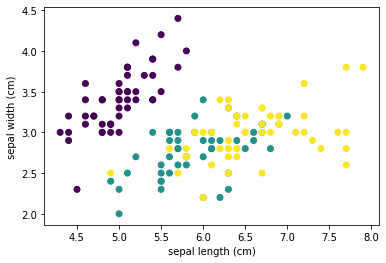

In [547]:
plt.scatter(df["sepal length"], df["sepal width"], c=df["class"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

2-


In [548]:
restrictedDataFrame = df.loc[df["class"] != 2]

In [549]:
restrictedDataFrame.groupby("class").describe()

sepal length                                           sepal width  \
             count   mean       std  min  25%  50%  75%  max       count   
class                                                                      
0             50.0  5.006  0.352490  4.3  4.8  5.0  5.2  5.8        50.0   
1             50.0  5.936  0.516171  4.9  5.6  5.9  6.3  7.0        50.0   

              ... petal length      petal width                             \
        mean  ...          75%  max       count   mean       std  min  25%   
class         ...                                                            
0      3.418  ...        1.575  1.9        50.0  0.244  0.107210  0.1  0.2   
1      2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   

                      
       50%  75%  max  
class                 
0      0.2  0.3  0.6  
1      1.3  1.5  1.8  

[2 rows x 32 columns]

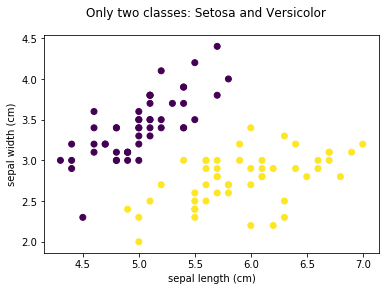

In [550]:
plt.scatter(restrictedDataFrame["sepal length"], restrictedDataFrame["sepal width"], c=restrictedDataFrame["class"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.suptitle("Only two classes: Setosa and Versicolor")
plt.show()

In [551]:
W = np.array([1,2,3,4,5,6])
X = np.array([1,2,3,4,5,6])
prd = W*X
print(prd)
#p =  1 if prd > 0 else 0

[ 1  4  9 16 25 36]
